###  Interseccion de funciones

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
rango=[-10,30]

UA=149597870700. #m
t_list=[i for i in range(0,56764800+1,2*24*60**2)] # t de 0 a 1.8 años (en segundos) en intervalos de dos dias
t=t_list[328]
e=.4
a=1.5*UA #m
G=6.674e-11 #Nm^2/kg^2
Ms=1.989e30 #kg

def f1(E):
    return E-e*np.sin(E)-t*(G*Ms/a**3)**.5
def f2(x):
    return 0

In [70]:
x_array=np.arange(rango[0],rango[1],.001)
y1_array=[f1(i) for i in x_array]
y2_array=[f2(i) for i in x_array]


ptosx=[]
ptosy1=[]
ptosy2=[]

# Verificamos que haya interseccion
for i in range(len(x_array)-1):
    if y1_array[i]<y2_array[i] and y1_array[i+1]>=y2_array[i+1] or y1_array[i]>=y2_array[i] and y1_array[i+1]<y2_array[i+1]:
    
        ptosx.append(x_array[i])
        ptosx.append(x_array[i+1])
        
        ptosy1.append(y1_array[i])
        ptosy1.append(y1_array[i+1])
    
        ptosy2.append(y2_array[i])
        ptosy2.append(y2_array[i+1])


def cruce_rectas(x1,x2,y11,y12,y21,y22):
    
    m1=(y12-y11)/(x2-x1)
    m2=(y22-y21)/(x2-x1)
    
    if (m1!=m2):
        
        b1=-x1*m1+y11
        b2=-x1*m2+y21

        #Pto de interseccion (a,c)
        a=(b2-b1)/(m1-m2)
        c=a*m1+b1
    
        return (a,c)

#Se recorre la lista x_array usando la funcion cruce_rectas 
ptos_crucex=[]
ptos_crucey=[]

#El indice es por que cruce_rectas entrega dos argumentos
for i in range(0,len(ptosx),2):
    ptos_crucex.append(cruce_rectas(ptosx[i],ptosx[i+1],ptosy1[i],ptosy1[i+1],ptosy2[i],ptosy2[i+1])[0])
    ptos_crucey.append(cruce_rectas(ptosx[i],ptosx[i+1],ptosy1[i],ptosy1[i+1],ptosy2[i],ptosy2[i+1])[1])



Se encontraron 1 intersecciones en el rango dado 

(6.051453775083217, 0.0)


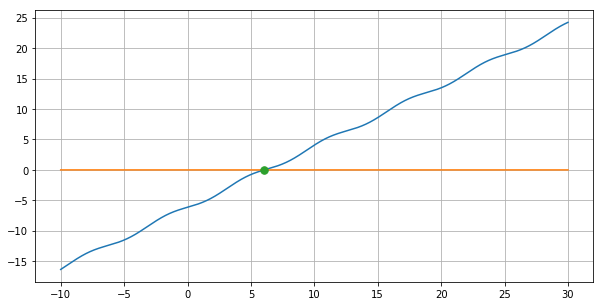

In [71]:
#Figura
print("Se encontraron %d intersecciones en el rango dado \n" %(len(ptos_crucex)))
for i in range(len(ptos_crucex)):
    print (ptos_crucex[i],ptos_crucey[i])
    
fig=plt.figure(figsize=(10,5))
ax=plt.axes()
ax.grid()
ax.plot(x_array,y1_array)
ax.plot(x_array,y2_array)
ax.plot(ptos_crucex,ptos_crucey,'.',markersize=15)
plt.show()